In [1]:
# get window size

from IPython.display import HTML, Javascript

javascript = '''
<script type="text/javascript">
    var kernel = IPython.notebook.kernel;
    kernel.execute("sw = " + window.innerWidth);
    kernel.execute("sh = " + window.innerHeight);
</script>
'''

HTML(javascript) # ポップアップウィンドウを表示

In [2]:
# スライドサイズ と スクロール の 設定

from notebook.services.config import ConfigManager
from IPython.paths import locate_profile
cm = ConfigManager(profile_dir=locate_profile(get_ipython().profile))
# cm = ConfigManager()
cm.update('livereveal', {
        'transition': 'fade',
#         'width': round(sw * 0.8),
#         'height': round(sh * 0.8),
        'width': 800,
        'height': 600,
        'scroll': True
})

{'height': 600, 'scroll': True, 'transition': 'fade', 'width': 800}

In [3]:
%%HTML
<link rel="stylesheet" type="text/css" href="sample.css">
<!-- スライド設定 -->

# Jupyter Notebook (+RISE) で<br>お手軽に発表
### しつつ お手軽 multiprocessing

e1371 奥村 嶺   
@KamuiRoeru  
<img src='https://pbs.twimg.com/profile_images/864491965395550208/-TkfCiPB_400x400.jpg', width="128" height="128">

# LT会 楽しんでますか？

素晴らしい登壇者の方々の発表を聞いて、  
**自分も何か発表したい！**

でも…発表するには スライド 作らなきゃ…

## PowerPointでスライド作ろうとすると…
- ソースコードをパワポに…(:D)┼┤
- パワポの数式… <# `Д´>
- プログラムを動かしながら発表したい … 無理
- そもそも、パワポでスライド作るのが面倒
- どうせなら **ひと味違う** スライド 見せたい

## Jupyter Notebook でスライド資料作ろう！！

### Jupyter Notebookって？
<ul style="font-size:70%">
<li>[IPython](http://ipython.org/ "Jupyter and the future of IPython &mdash; IPython") Notebook</li>
<li>Webブラウザ（やその他のプラットフォーム）上で動く REPL。</li>
<li>Python の他に、[Julia](http://julialang.org/ "The Julia Language"), Ruby, Haskell, … 等、様々な「カーネル」を利用可能。</li>
<li>Markdown で文章（メモ）も記述可能。$\TeX$ 記法で数式も記述可能。</li>
<li>reveal.js を利用したスライドにも変換可能。</li>
</ul>

### Jupyter Notebook（+ RISE）の 凄み
- プログラムを **実行しながら** 発表できる

In [4]:
print('Hello Jupyter!!')
print('Hello Jupyter!!'[::-1])

Hello Jupyter!!
!!retypuJ olleH


`x = \sum_{i=0}^n a_n \quad \text{シグマ〜}`

$$
    x = \sum_{i=0}^n a_n \quad \text{シグマ〜}
$$

In [5]:
n = 10
a = list(range(n))
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [6]:
x = sum(a)
x

45

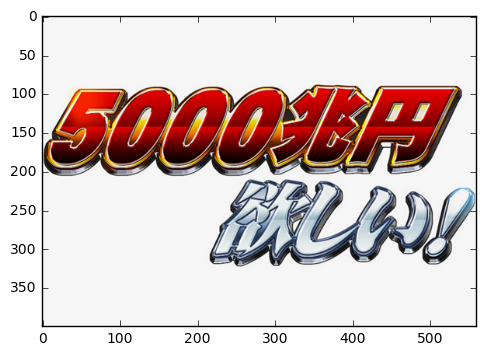

In [7]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

im = Image.open("./5000tyoYen_Hoshiii.jpg")
im_list = np.asarray(im)
plt.imshow(im_list)
plt.show()

### ようするに…

### Jupyter Notebook 神

# アニメーションも使える

<IPython.core.display.Javascript object>


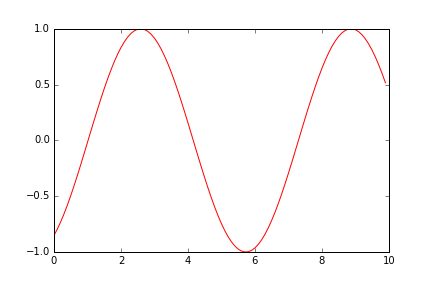

In [9]:
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()
x = np.arange(0, 10, 0.1)

ims = []
for a in range(50):
    y = np.sin(x - a)
    im = plt.plot(x, y, "r")
    ims.append(im)

ani = animation.ArtistAnimation(fig, ims)
plt.show()


<IPython.core.display.Javascript object>


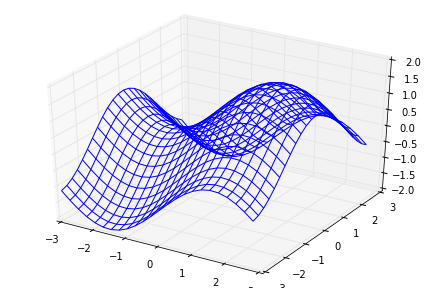

In [11]:
%matplotlib nbagg

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-3, 3, 0.25)
y = np.arange(-3, 3, 0.25)
X, Y = np.meshgrid(x, y)
Z = np.sin(X)+ np.cos(Y)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X,Y,Z)

plt.show()


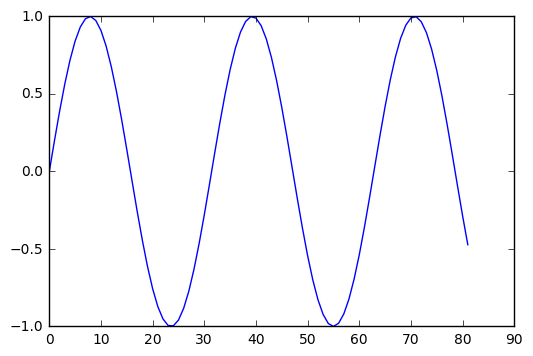

In [12]:
%matplotlib inline
from ipywidgets import interact
import numpy as np

def scatter(num_data):
    x = range(num_data)
    y = [np.sin(t/5.0) for t in x]
    plt.plot(x, y)
    plt.show()

interact(scatter, num_data=(1,1000, 1), value=2)

### Jupyter Notebook + RISE の <span style="color:red">メリット</span>
- Free
- Markdown
- プログラムを実行しながら発表できる


### Jupyter Notebook + RISE の <span style="color:blue">デメリット</span>
- 環境構築が少し必要（スクリプト叩くだけ）
- 動きゴテゴテのスライドはキツイ<br>ヘッダ・フッタ、アニメーション等
- 微調整が面倒（cssを殴る必要がある）
- 若干不安定

# Jupyter とか RISE とかの詳しい情報

### ホームページ
<ul style="font-size:70%">
<li>Jupyter : http://jupyter.org/</li>
<li>RISE : https://github.com/damianavila/RISE</li>
</ul>

### 使い方 とか
<ul style="font-size:70%">
<li>Jupyterインストール : http://qiita.com/KI1208/items/a7765e6fdc95c3e03609</li>
<li>RISE概要とインストール : http://qiita.com/cvusk/items/d425751ba663dc8c6517</li>
<li>RISE CSS の 殴り方 : http://qiita.com/kamuiroeru/items/f0cf7079f4058522fa80</li>
</ul>

# Pythonでマルチプロセッシング

複数スレッドを立てて効率よくプログラムを実行させたい！

python 3.5.2

#### 実行に0.5秒かかる プログラム

In [14]:
from time import sleep
from os import getpid

def procedure(hoge=None):
    sleep(0.5)
    print('This Process is ' + str(getpid()))

8回繰り返し実行したい

In [15]:
%%time
for _ in range(8):
    procedure()

This Process is 96170
This Process is 96170
This Process is 96170
This Process is 96170
This Process is 96170
This Process is 96170
This Process is 96170
This Process is 96170
CPU times: user 8.62 ms, sys: 3.66 ms, total: 12.3 ms
Wall time: 4.03 s


In [17]:
%%time
from multiprocessing import Pool
with Pool(4) as p:
    p.map(procedure, range(8))

This Process is 96214
This Process is 96215
This Process is 96216
This Process is 96217
This Process is 96214
This Process is 96215
This Process is 96216
This Process is 96217
CPU times: user 13.2 ms, sys: 22.7 ms, total: 35.9 ms
Wall time: 1.16 s


## もっと実用的な例
とある 文書 が 5000 文書あります。

それぞれの文書に含まれる**単語の個数**を数えてください

In [18]:
cat ../share/data/001.txt

両生類・爬虫類天然記念物一覧
出典: フリー百科事典『ウィキペディア（Wikipedia）』
移動: ナビゲーション, 検索 
両生類・爬虫類天然記念物一覧は、日本の文部科学大臣が指定する、天然記念物（特別天然記念物を含む、以下同）のうち、両生類・爬虫類に関わるもののリスト。天然記念物指定基準「動物」に基づき指定されたもののうち、両生類・爬虫類の種および生息地、繁殖地等を掲載する。なお、本項では文化財保護法に基づき国（日本国文部科学大臣）が指定した天然記念物を対象とし、地方自治体指定の天然記念物は対象外とする。

目次 [非表示]
1 特別天然記念物
2 天然記念物 
2.1 両生類
2.2 爬虫類
3 関連項目
4 参考文献
5 外部リンク
 
 特別天然記念物 [編集]
オオサンショウウオ（種指定）
 天然記念物 [編集]
 両生類 [編集]
（オオサンショウウオ） 
オオサンショウウオ生息地〔岐阜県郡上市和良町・八幡町〕
オオサンショウウオ生息地〔岐阜県郡上市大和町〕
オオサンショウウオ生息地〔岡山県真庭市〕
オオサンショウウオ生息地〔大分県宇佐市〕
（カジカガエル） 
湯原カジカガエル生息地〔岡山県真庭市〕
南桑カジカガエル生息地〔山口県岩国市〕
（モリアオガエル） 
大揚沼のモリアオガエルおよびその繁殖地〔岩手県八幡平市〕
平伏沼モリアオガエル繁殖地〔福島県双葉郡川内村〕
 爬虫類 [編集]
（アオダイショウ） 
岩国のシロヘビ
（アカウミガメ） 
御前崎のウミガメおよびその産卵地〔静岡県御前崎市〕
大浜海岸のウミガメおよびその産卵地〔徳島県海部郡美波町〕
キシノウエトカゲ
（クサガメ） 
見島のカメ生息地〔山口県萩市〕
セマルハコガメ
リュウキュウヤマガメ
 関連項目 [編集]
天然記念物
レッドリスト
 参考文献 [編集]
加藤睦奥雄ら監修 『日本の天然記念物』 講談社、1995年、ISBN 4-06-180589-4。
 外部リンク [編集]
文化庁 
国指定文化財等データベース
国宝及び重要文化財指定基準並びに特別史跡名勝天然記念物及び史跡名勝天然記念物指定基準
「http://ja.wikipedia.org/wiki/%E4%B8%A1%E7%94%9F%E9%A1%9E%E3%83%BB%E7%88%AC%E8%99%AB%E9%A1%9E%

In [20]:
import MeCab
m = MeCab.Tagger('-Owakati')
wakati = m.parse(open('../share/data/001.txt').read())
wakati = '⚡'.join(wakati.split(' '))
print(wakati)

両生類⚡・⚡爬虫類⚡天然記念物⚡一覧⚡出典⚡:⚡フリー⚡百科事典⚡『⚡ウィキペディア⚡（⚡Wikipedia⚡）⚡』⚡移動⚡:⚡ナビゲーション⚡,⚡検索⚡両生類⚡・⚡爬虫類⚡天然記念物⚡一覧⚡は⚡、⚡日本⚡の⚡文部科学大臣⚡が⚡指定⚡する⚡、⚡天然記念物⚡（⚡特別天然記念物⚡を⚡含む⚡、⚡以下⚡同⚡）⚡の⚡うち⚡、⚡両生類⚡・⚡爬虫類⚡に⚡関わる⚡もの⚡の⚡リスト⚡。⚡天然記念物⚡指定基準⚡「⚡動物⚡」⚡に⚡基づき⚡指定⚡さ⚡れ⚡た⚡もの⚡の⚡うち⚡、⚡両生類⚡・⚡爬虫類⚡の⚡種⚡および⚡生息地⚡、⚡繁殖⚡地⚡等⚡を⚡掲載⚡する⚡。⚡なお⚡、⚡本⚡項⚡で⚡は⚡文化財保護法⚡に⚡基づき⚡国⚡（⚡日本国⚡文部科学大臣⚡）⚡が⚡指定⚡し⚡た⚡天然記念物⚡を⚡対象⚡と⚡し⚡、⚡地方自治体⚡指定⚡の⚡天然記念物⚡は⚡対象外⚡と⚡する⚡。⚡目次⚡[⚡非表示⚡]⚡1⚡特別天然記念物⚡2⚡天然記念物⚡2⚡.⚡1⚡両生類⚡2⚡.⚡2⚡爬虫類⚡3⚡関連⚡項目⚡4⚡参考文献⚡5⚡外部⚡リンク⚡特別天然記念物⚡[⚡編集⚡]⚡オオサンショウウオ⚡（⚡種⚡指定⚡）⚡天然記念物⚡[⚡編集⚡]⚡両生類⚡[⚡編集⚡]⚡（⚡オオサンショウウオ⚡）⚡オオサンショウウオ⚡生息地⚡〔⚡岐阜県郡上市⚡和良町⚡・⚡八幡町⚡〕⚡オオサンショウウオ⚡生息地⚡〔⚡岐阜県郡上市⚡大和町⚡〕⚡オオサンショウウオ⚡生息地⚡〔⚡岡山県真庭市⚡〕⚡オオサンショウウオ⚡生息地⚡〔⚡大分県宇佐市⚡〕⚡（⚡カジカガエル⚡）⚡湯原⚡カジカガエル⚡生息地⚡〔⚡岡山県真庭市⚡〕⚡南桑⚡カジカガエル⚡生息地⚡〔⚡山口県岩国市⚡〕⚡（⚡モリアオガエル⚡）⚡大揚沼⚡の⚡モリアオガエル⚡および⚡その⚡繁殖⚡地⚡〔⚡岩手県八幡平市⚡〕⚡平伏⚡沼⚡モリアオガエル⚡繁殖⚡地⚡〔⚡福島県⚡双葉⚡郡⚡川内村⚡〕⚡爬虫類⚡[⚡編集⚡]⚡（⚡アオダイショウ⚡）⚡岩国のシロヘビ⚡（⚡アカウミガメ⚡）⚡御前崎⚡の⚡ウミガメ⚡および⚡その⚡産卵⚡地⚡〔⚡静岡県御前崎市⚡〕⚡大浜海岸⚡の⚡ウミガメ⚡および⚡その⚡産卵⚡地⚡〔⚡徳島県⚡海部⚡郡⚡美波町⚡〕⚡キシノウエトカゲ⚡（⚡クサガメ⚡）⚡見島⚡の⚡カメ⚡生息地⚡〔⚡山口県萩市⚡〕⚡セマルハコガメ⚡リュウキュウヤマガメ⚡関連⚡項目⚡[⚡編集⚡]⚡天然記念物⚡レッドリスト⚡参考文献⚡[⚡編集⚡]⚡加藤⚡睦⚡奥⚡雄⚡ら⚡

In [21]:
from collections import Counter

def parse_count(filename):
        wakati = m.parse(open(filename).read()).split(' ')
        return Counter(wakati)

parse_count('../share/data/001.txt')

Counter({'\n': 1,
         '%': 16,
         ',': 1,
         '-': 3,
         '.': 4,
         '/': 1,
         '/%': 1,
         '06': 1,
         '1': 2,
         '180589': 1,
         '1995年': 1,
         '2': 4,
         '3': 1,
         '4': 3,
         '4%': 3,
         '5': 1,
         '5%': 2,
         '6%': 1,
         '7': 1,
         '7%': 4,
         '8%': 5,
         '80%': 1,
         '83%': 1,
         '84%': 1,
         '88%': 1,
         '89%': 1,
         '9': 3,
         '9%': 2,
         '94%': 1,
         '98%': 1,
         '99%': 1,
         ':': 3,
         'A': 2,
         'A1': 3,
         'A6': 1,
         'A8': 1,
         'A9': 2,
         'AB': 1,
         'AC': 1,
         'B': 3,
         'B5': 1,
         'BB': 1,
         'BF': 1,
         'E': 15,
         'E3': 1,
         'F': 1,
         'ISBN': 1,
         'Wikipedia': 1,
         '[': 8,
         ']': 8,
         'http://': 1,
         'ja': 1,
         'org': 1,
         'wiki': 1,
         'wik

In [22]:
from glob import glob
filenameList = glob('../share/data/*.txt')[:1500]

In [23]:
filenameList[:10]

['../share/data/0003.txt',
 '../share/data/0005.txt',
 '../share/data/0006.txt',
 '../share/data/0007.txt',
 '../share/data/0009.txt',
 '../share/data/001.txt',
 '../share/data/0010.txt',
 '../share/data/0015.txt',
 '../share/data/0016.txt',
 '../share/data/0019.txt']

### map関数

リスト全てに同じ関数を適用させる

In [24]:
from math import sqrt  # 平方根
list(map(sqrt, [0,1,2,3,4,5]))

[0.0, 1.0, 1.4142135623730951, 1.7320508075688772, 2.0, 2.23606797749979]

In [25]:
%%time
a = list(map(parse_count, filenameList))

CPU times: user 3.98 s, sys: 1.69 s, total: 5.67 s
Wall time: 11.9 s


In [26]:
%%time
from multiprocessing import Pool
with Pool(4) as p:
    b = p.map(parse_count, filenameList)

CPU times: user 401 ms, sys: 90 ms, total: 491 ms
Wall time: 1.89 s


### Pool使えばPythonで簡単に<br>マルチプロセッシングできる

multiprocessing から Pool を インポート して map 見たく使う

```python
from multiprocessing import Pool

with Pool(最大プロセス数) as p:
    b = p.map(関数, リスト)
```

## multiprocessing の 詳細
- 公式ドキュメント : https://docs.python.jp/3/library/multiprocessing.html

#### その他の使い方紹介
- Pythonでmultiprocessing.Poolを使ってお手軽並列処理 :  
http://matsulib.hatenablog.jp/entry/2014/06/19/001050
- Python で並列処理(初めての人向け) : http://iatlex.com/python/parallel_first/
